# **PROJETO DO MÓDULO II - COBERTURA VACINAL**

 

## **ESCOPO DO DESAFIO:**

neste desafio queremos que você aplique tudo que aprendeu no módulo 1 e 2, analisando dados do [programa de imunização nacional](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def), você pode analisar dados de **imunos** escolhidos por você, pode analisar toda a base de dados, apenas do seu estado ou de estados específicos. Pode analisar as taxas a cobertura ou doses calculadas, buscar outras fontes de informações fora do data SUS, como também, usar outros dados do DataSUS para enriquecer suas análises.

## **RESUMO E CONCLUSÕES DA ANÁLISE**

## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

## **FONTES CONSULTADAS**

Fonte Datasus: [TABNET](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf)



## **ANÁLISE EXPLORATÓRIA:**



#### **Importando Bibliotecas**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Bases de dados preliminares**

In [2]:
fonte= 'http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def'
fonte_atualizada = 'http://tabnet.datasus.gov.br/cgi/dhdat.exe?bd_pni/cpnibr.def'

In [4]:
#pegando as bases
base_ano_imuno = 'https://raw.githubusercontent.com/ClarisseAlvarenga/bootcamp_alura/master/modulo2/dados_atualizados/cv_ano_imuno.csv'
base_cv_uf_2015 = 'https://raw.githubusercontent.com/ClarisseAlvarenga/bootcamp_alura/master/modulo2/dados_atualizados/cv_uf_2015.csv'
base_cv_uf_2016 ='https://raw.githubusercontent.com/ClarisseAlvarenga/bootcamp_alura/master/modulo2/dados_atualizados/cv_uf_2016.csv'
base_cv_uf_2017 ='https://raw.githubusercontent.com/ClarisseAlvarenga/bootcamp_alura/master/modulo2/dados_atualizados/cv_uf_2017.csv'
base_cv_uf_2018 ='https://raw.githubusercontent.com/ClarisseAlvarenga/bootcamp_alura/master/modulo2/dados_atualizados/cv_uf_2018.csv'
base_cv_uf_2019 ='https://raw.githubusercontent.com/ClarisseAlvarenga/bootcamp_alura/master/modulo2/dados_atualizados/cv_uf_2019.csv'
base_cv_uf_total ='https://raw.githubusercontent.com/ClarisseAlvarenga/bootcamp_alura/master/modulo2/dados_atualizados/cv_uf_periodo.csv'

### **ANÁLISES PRELIMINARES - MANIPULAÇÃO DAS BASES DE DADOS**

In [5]:
#lendo as bases de dados
dados_ano_imuno = pd.read_csv(base_ano_imuno, encoding='ISO-8859-1', sep=';', decimal=',')
dados_2015 = pd.read_csv(base_cv_uf_2015, encoding='ISO-8859-1', sep=';', decimal=',') 
dados_2016 = pd.read_csv(base_cv_uf_2016, encoding='ISO-8859-1', sep=';', decimal=',') 
dados_2017 = pd.read_csv(base_cv_uf_2017, encoding='ISO-8859-1', sep=';', decimal=',') 
dados_2018 = pd.read_csv(base_cv_uf_2018, encoding='ISO-8859-1', sep=';', decimal=',') 
dados_2019 = pd.read_csv(base_cv_uf_2019, encoding='ISO-8859-1', sep=';', decimal=',') 
dados_periodo = pd.read_csv(base_cv_uf_total, encoding='ISO-8859-1', sep=';', decimal=',') 

In [6]:
dados_ano_imuno.head()

,Imuno,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,BCG,88.31,103.63,104.21,117.12,111.61,117.28,111.74,112.60,110.28,108.47,113.36,114.48,113.06,111.08,108.91,108.71,106.71,107.94,105.69,107.42,107.28,105.08,95.55,97.98,99.72,86.67,64.71,105.78
1,Hepatite B em crianças até 30 dias,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,88.54,90.93,81.75,85.88,88.40,78.57,55.89,71.41
2,Rotavírus Humano,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,46.52,79.79,81.18,85.99,83.04,87.06,86.37,93.52,93.44,95.35,88.98,85.12,91.33,85.40,67.59,60.69
3,Meningococo C,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.88,105.66,96.18,99.70,96.36,98.19,91.68,87.44,88.49,87.41,68.17,64.09
4,Hepatite B,8.85,10.50,16.50,5.79,12.63,83.50,91.08,91.88,91.47,92.00,96.26,98.46,100.30,99.89,96.06,100.20,96.08,97.71,96.67,100.56,96.42,97.74,105.19,84.40,88.53,70.77,66.20,78.36


In [7]:
dados_2015.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
Imuno,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Febre Amarela,Hepatite A,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,Tríplice Bacteriana(DTP)(1º ref),Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
RO,110.77,104.78,103.95,104.02,106.35,104.54,104.68,105.44,106.06,116.26,97.84,92.16,97.24,109,94.61,94.63,104.63,95.82,73.92,64.65,103.36,229.39,111.27
AC,105.9,69.63,82.5,88.64,82.62,81.24,72.48,82.74,66.67,73.22,59.39,57.9,57.94,84.21,51.69,49.3,81.3,62.7,17.13,12.08,83.71,158.09,75.54
AM,110.79,101.09,88.88,94.91,95.21,94.61,84.54,104.8,92.52,97.74,79.07,80.67,82.98,95.42,78.17,77.43,94.65,78.68,51.92,49.29,93.31,175.09,94.95
RR,110.55,74.28,94.18,95.34,97.26,96.71,89.86,112.28,93.64,98.21,90.61,88.63,99.15,108.45,92.42,92.53,96.87,88.27,52.24,43.67,97.62,251.39,105.27


In [8]:
#inserindo uma coluna com o ano
def inserir_coluna_com_valor_unico(dados, valor):
  dados['ano'] = valor


In [9]:
#inserindo a coluna em todos os 5 dataframes escolhidos
anos = [2015,2016,2017,2018,2019]
bases = [dados_2015,dados_2016, dados_2017, dados_2018, dados_2019]
for i in range(0,5):
  inserir_coluna_com_valor_unico(bases[i], anos[i])


In [10]:
dados_2019.head()

,Imuno,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total,ano
0,BCG,88.11,93.86,93.27,115.88,83.06,100.27,112.41,83.57,82.58,86.05,85.29,94.90,92.07,91.54,85.41,78.05,88.76,90.10,79.62,83.78,91.19,83.43,87.83,114.25,90.11,86.73,93.24,86.67,2019
1,Hepatite B em crianças até 30 dias,86.75,91.26,89.62,115.53,75.47,90.97,111.88,77.83,81.51,78.89,83.35,86.93,88.38,83.73,84.33,73.74,81.77,83.53,50.77,77.52,70.89,79.94,78.35,111.71,86.96,77.48,102.65,78.57,2019
2,Rotavírus Humano,88.92,84.50,82.55,78.95,76.03,78.73,88.73,77.52,82.40,94.96,84.56,95.51,86.73,88.83,82.03,75.23,90.40,88.70,75.05,87.17,90.80,95.35,86.94,94.82,86.18,83.98,85.38,85.40,2019
3,Meningococo C,92.63,89.67,89.23,83.54,77.41,84.90,93.52,77.80,85.44,97.42,85.25,96.90,88.71,91.80,86.80,78.53,91.46,90.46,76.81,87.88,92.93,97.88,90.81,97.25,90.31,85.67,85.69,87.41,2019
4,Hepatite B,89.66,76.42,78.58,64.39,62.38,52.67,76.38,58.58,68.15,80.06,68.87,82.21,73.70,79.12,76.81,66.89,74.36,66.38,55.16,72.14,79.03,71.98,71.77,85.74,72.52,64.00,69.95,70.77,2019


In [11]:
#compilando as bases anuais
compilado = pd.concat(bases)

In [12]:
compilado.tail()

,Imuno,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total,ano
17,DTP REF (4 e 6 anos),49.83,44.19,64.28,67.49,35.44,46.54,53.13,33.17,46.57,49.94,47.27,59.57,48.24,42.23,56.66,50.83,59.62,44.80,36.84,64.46,78.82,55.69,66.37,70.51,54.29,34.41,52.05,53.74,2019
18,Tríplice Bacteriana(DTP)(1º ref),55.01,51.30,65.04,68.09,44.11,50.37,55.40,46.21,55.64,57.20,56.12,67.23,55.37,50.96,61.36,62.15,68.71,44.64,39.61,58.48,76.48,54.50,64.98,66.40,57.57,36.50,52.46,57.08,2019
19,Dupla adulto e tríplice acelular gestante,53.32,49.19,53.39,42.43,46.78,48.48,51.01,42.83,46.71,60.45,45.06,50.89,53.46,53.82,42.47,34.64,44.68,57.38,34.37,40.27,44.45,55.50,47.95,62.99,45.07,36.42,58.02,45.02,2019
20,dTpa gestante,75.54,64.51,69.61,70.99,59.87,58.98,75.97,62.71,62.73,70.42,64.49,69.50,68.23,68.59,57.61,55.69,70.10,73.10,54.09,54.77,68.69,71.96,68.08,79.42,67.12,64.04,72.20,63.23,2019
21,Total,82.12,74.83,79.80,77.48,65.14,69.27,82.12,63.23,69.58,75.18,68.19,76.94,71.10,71.79,68.84,65.14,77.86,75.32,61.19,74.50,82.87,83.98,79.46,90.84,78.28,71.93,79.12,73.44,2019


In [13]:
#organizando por estado
compilado_por_estado = compilado.set_index('Imuno').T

In [14]:
compilado_por_estado.head()

Imuno,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Febre Amarela,Hepatite A,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,Tríplice Bacteriana(DTP)(1º ref),Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Febre Amarela,Hepatite A,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,...,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1º ref),Dupla adulto e tríplice acelular gestante,dTpa gestante,Total,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1º ref),Dupla adulto e tríplice acelular gestante,dTpa gestante,Total
RO,110.77,104.78,103.95,104.02,106.35,104.54,104.68,105.44,106.06,116.26,97.84,92.16,97.24,109.00,94.61,94.63,104.63,95.82,73.92,64.65,103.36,229.39,111.27,104.90,99.55,104.70,105.46,119.63,103.31,104.22,105.44,114.05,84.04,100.89,109.15,73.56,109.79,94.32,94.97,103.52,...,99.94,99.94,103.21,101.89,59.28,89.69,82.06,88.09,89.63,74.30,101.65,78.87,53.43,62.27,72.16,46.15,59.28,82.92,88.11,86.75,88.92,92.63,89.66,89.66,102.44,98.26,63.78,81.42,85.01,97.68,89.81,75.47,106.42,82.25,70.74,49.83,55.01,53.32,75.54,82.12
AC,105.90,69.63,82.50,88.64,82.62,81.24,72.48,82.74,66.67,73.22,59.39,57.90,57.94,84.21,51.69,49.30,81.30,62.70,17.13,12.08,83.71,158.09,75.54,99.23,88.86,76.81,78.69,81.55,74.92,84.98,71.27,64.33,60.42,58.13,73.01,58.75,75.71,64.20,64.45,75.02,...,70.66,70.66,89.64,78.34,37.61,66.74,76.05,73.34,67.39,58.27,83.11,71.92,59.06,53.12,63.25,41.42,56.56,69.84,93.86,91.26,84.50,89.67,76.42,76.42,91.53,81.73,50.98,68.69,80.62,78.82,85.96,70.66,87.39,78.65,75.68,44.19,51.30,49.19,64.51,74.83
AM,110.79,101.09,88.88,94.91,95.21,94.61,84.54,104.80,92.52,97.74,79.07,80.67,82.98,95.42,78.17,77.43,94.65,78.68,51.92,49.29,93.31,175.09,94.95,95.87,85.80,75.15,82.77,106.98,82.35,88.36,76.24,75.83,68.07,79.58,88.89,68.19,83.56,75.60,75.80,82.42,...,79.36,79.36,90.04,79.25,56.36,69.88,78.16,78.69,76.48,66.89,89.81,78.00,58.52,65.82,69.56,52.72,65.79,75.22,93.27,89.62,82.55,89.23,78.58,78.58,92.51,83.29,75.83,74.10,85.32,86.41,90.88,77.02,92.12,82.29,72.71,64.28,65.04,53.39,69.61,79.80
RR,110.55,74.28,94.18,95.34,97.26,96.71,89.86,112.28,93.64,98.21,90.61,88.63,99.15,108.45,92.42,92.53,96.87,88.27,52.24,43.67,97.62,251.39,105.27,107.95,79.97,86.72,97.78,92.39,91.68,100.64,88.45,87.95,72.93,86.85,114.81,87.45,90.77,83.50,83.64,91.68,...,83.52,83.52,93.27,79.79,63.95,72.72,83.38,78.03,80.58,82.78,99.32,88.27,71.34,70.52,77.10,39.52,61.47,83.50,115.88,115.53,78.95,83.54,64.39,64.39,90.26,79.76,67.68,69.77,81.05,72.63,77.20,69.29,81.21,86.72,74.53,67.49,68.09,42.43,70.99,77.48
PA,94.87,81.63,72.51,76.55,73.63,73.13,60.36,72.09,57.71,73.83,61.61,61.71,58.78,71.92,45.78,37.78,73.15,60.52,14.44,9.71,72.65,134.96,67.51,81.62,55.28,69.33,72.49,76.33,67.08,75.72,63.15,59.57,55.85,59.71,74.02,43.22,69.61,62.34,62.39,67.08,...,58.04,58.04,78.83,69.09,27.23,63.11,67.66,64.61,59.05,51.29,77.30,59.97,48.29,44.06,53.94,41.19,52.72,60.48,83.06,75.47,76.03,77.41,62.38,62.38,82.14,72.72,39.49,62.60,72.67,73.55,74.55,60.00,82.81,71.34,59.90,35.44,44.11,46.78,59.87,65.14


## **ESCOLHA DO CAMINHO DE ESTUDO A SEGUIR - DEFINIÇÃO DO ESCOPO**

### **Primeiras visualizações**

Para reduzir um pouco o escopo da pesquisa, vamos escolher algumas vacinas para visualizar graficamente. Para isso precisamos separá-las do grupo de forma que tenhamos as UFs como Índice e os anos escolhidos (2015 a 2019) como colunas

#### **Separando as vacinas escolhidas do Dataset origina**l

Escolhemos 5 vacinas para uma visualização preliminar, por estarem vinculadas a doenças e campanhas recentes ***(Tuberculose)***, surtos recentes ***(Sarampo, Poliomielite e Rubéola)***, mudança de calendário ***(Febre Amarela)*** ou implementação recente ***(a vacina dTPA contra Difteria, Coqueluche e Tétano para gestantes, implantada em setembro de 2013)***

In [27]:
#pegando os dados anuais de algumas vacinas relacionadas à Sarampo, Pólio, Febre Amarela e Rubéola, bem como a dtpa para gestantes
BCG = compilado_por_estado[['BCG']].T.set_index('ano').T #tuberculose
febre_amarela = compilado_por_estado[['Febre Amarela']].T.set_index('ano').T #difteria
polio = compilado_por_estado[['Poliomielite']].T.set_index('ano').T #poliomielite
triplice_d2 = compilado_por_estado[['Tríplice Viral  D2']].T.set_index('ano').T #sarampo e rubéola
dtpa = compilado_por_estado[['dTpa gestante']].T.set_index('ano').T

In [16]:
polio.head()

ano,2015.0,2016.0,2017.0,2018.0,2019.0
RO,105.44,105.44,108.18,101.89,98.26
AC,82.74,71.27,74.01,78.34,81.73
AM,104.80,76.24,76.43,79.25,83.29
RR,112.28,88.45,90.52,79.79,79.76
PA,72.09,63.15,67.63,69.09,72.72


In [17]:
compilado_por_estado.columns

Index(['BCG', 'Hepatite B  em crianças até 30 dias', 'Rotavírus Humano',
       'Meningococo C', 'Hepatite B', 'Penta', 'Pneumocócica', 'Poliomielite',
       'Febre Amarela', 'Hepatite A',
       ...
       'Meningococo C (1º ref)', 'Poliomielite(1º ref)', 'Tríplice Viral  D1',
       'Tríplice Viral  D2', 'Tetra Viral(SRC+VZ)', 'DTP REF (4 e 6 anos)',
       'Tríplice Bacteriana(DTP)(1º ref)',
       'Dupla adulto e tríplice acelular gestante', 'dTpa gestante', 'Total'],
      dtype='object', name='Imuno', length=113)

#### **Análise Gráfica - Preliminar**

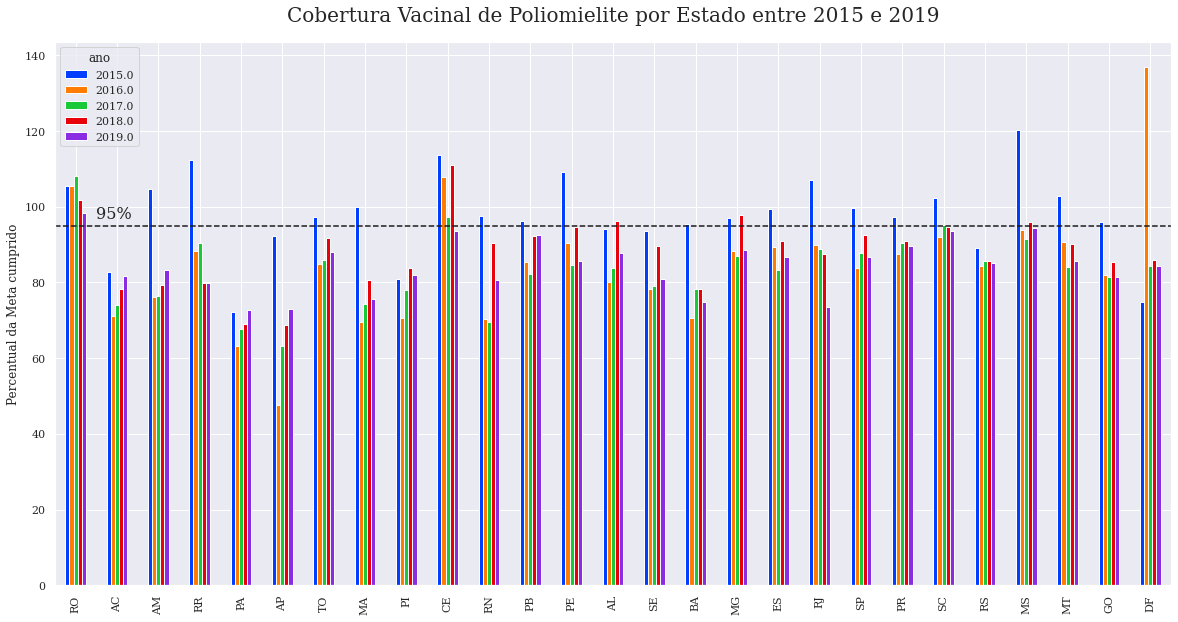

In [18]:
sns.set_theme(font='serif', palette='bright')
polio[:-1].plot(kind='bar', figsize=(20,10))
ax = plt.axhline(95, color='k', ls='--')
plt.annotate('95%', xy=(0.5,97), fontsize=16)
plt.title('Cobertura Vacinal de Poliomielite por Estado entre 2015 e 2019', fontsize=20, pad= 20)
plt.ylabel('Percentual da Meta cumprido');

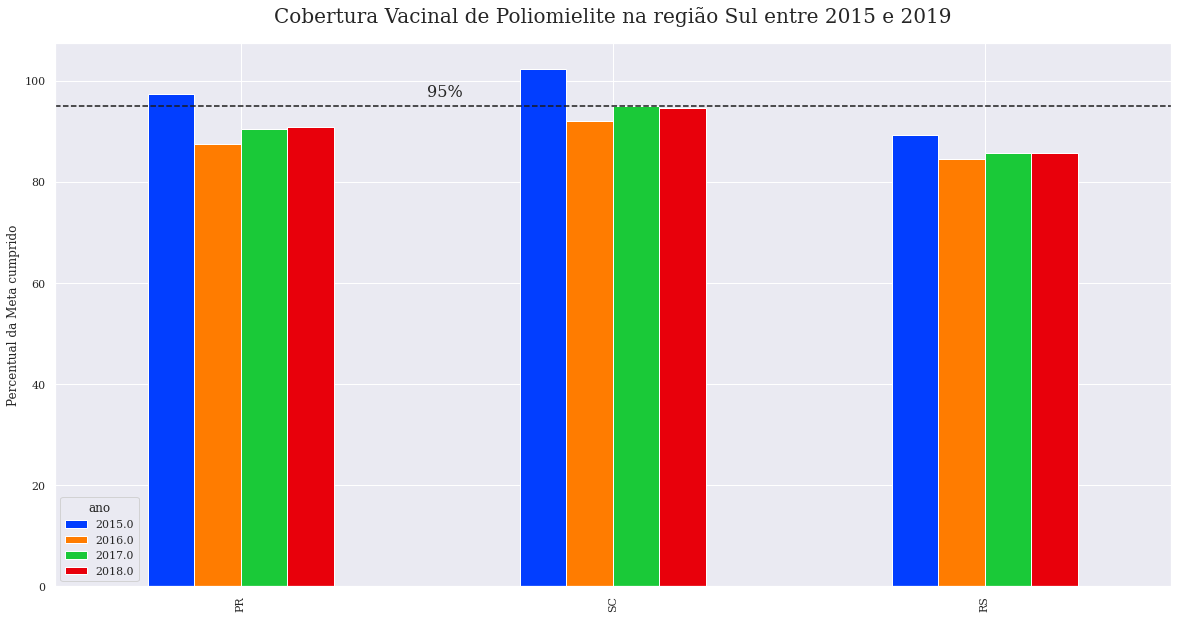

In [19]:
sns.set_theme(font='serif', palette='bright')
polio.iloc[[20,21,22] , : -1].plot(kind='bar', figsize=(20,10))
ax = plt.axhline(95, color='k', ls='--')
plt.annotate('95%', xy=(0.5,97), fontsize=16)
plt.title('Cobertura Vacinal de Poliomielite na região Sul entre 2015 e 2019', fontsize=20, pad= 20)
plt.ylabel('Percentual da Meta cumprido');

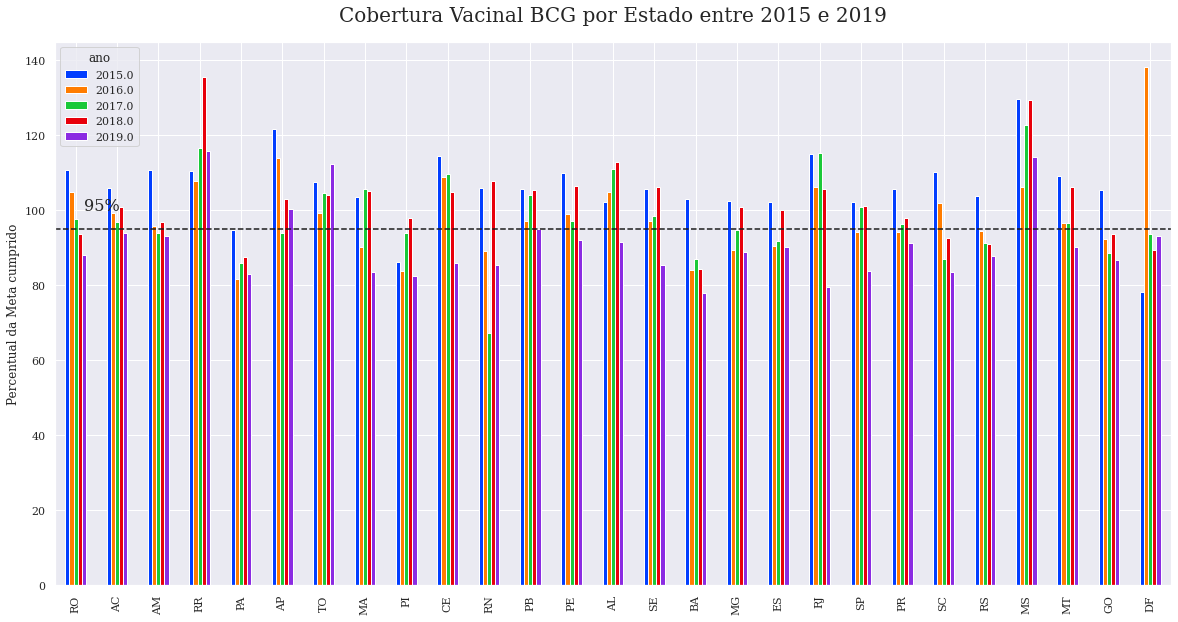

In [20]:
sns.set_theme(font='serif', palette='bright')
BCG[:-1].plot(kind='bar', figsize=(20,10))
ax = plt.axhline(95, color='k', ls='--')
plt.annotate('95%', xy=(0.2,100), fontsize=16)
plt.title('Cobertura Vacinal BCG por Estado entre 2015 e 2019', fontsize=20, pad= 20)
plt.ylabel('Percentual da Meta cumprido');

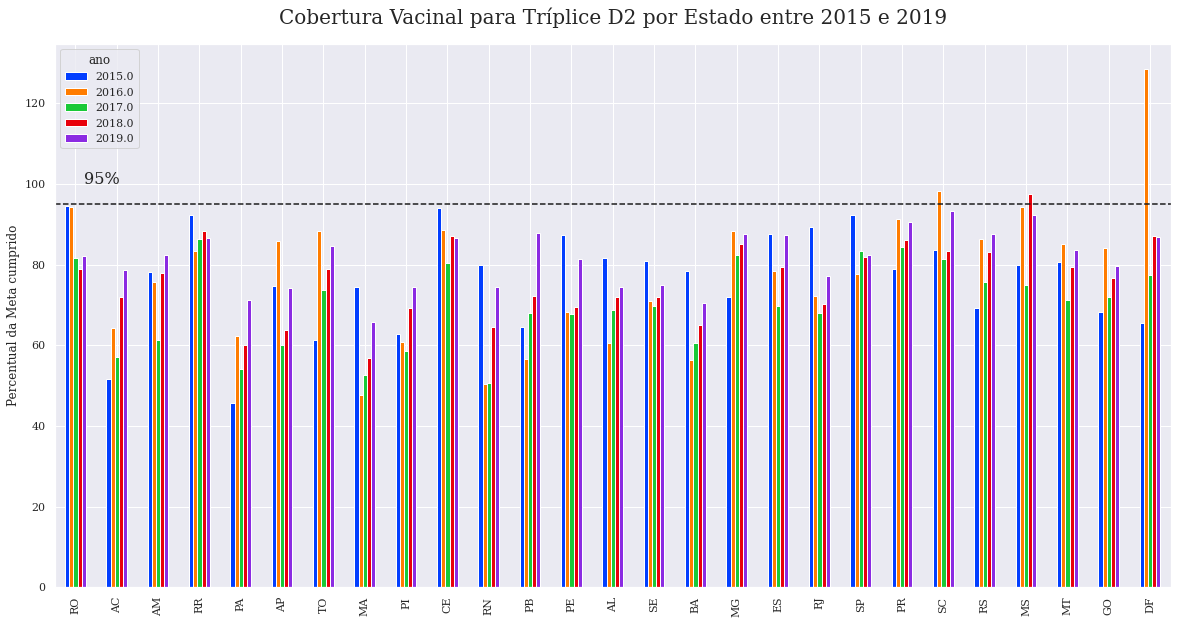

In [21]:
sns.set_theme(font='serif', palette='bright')
triplice_d2[:-1].plot(kind='bar', figsize=(20,10))
ax = plt.axhline(95, color='k', ls='--')
plt.annotate('95%', xy=(0.2,100), fontsize=16)
plt.title('Cobertura Vacinal para Tríplice D2 por Estado entre 2015 e 2019', fontsize=20, pad= 20)
plt.ylabel('Percentual da Meta cumprido');

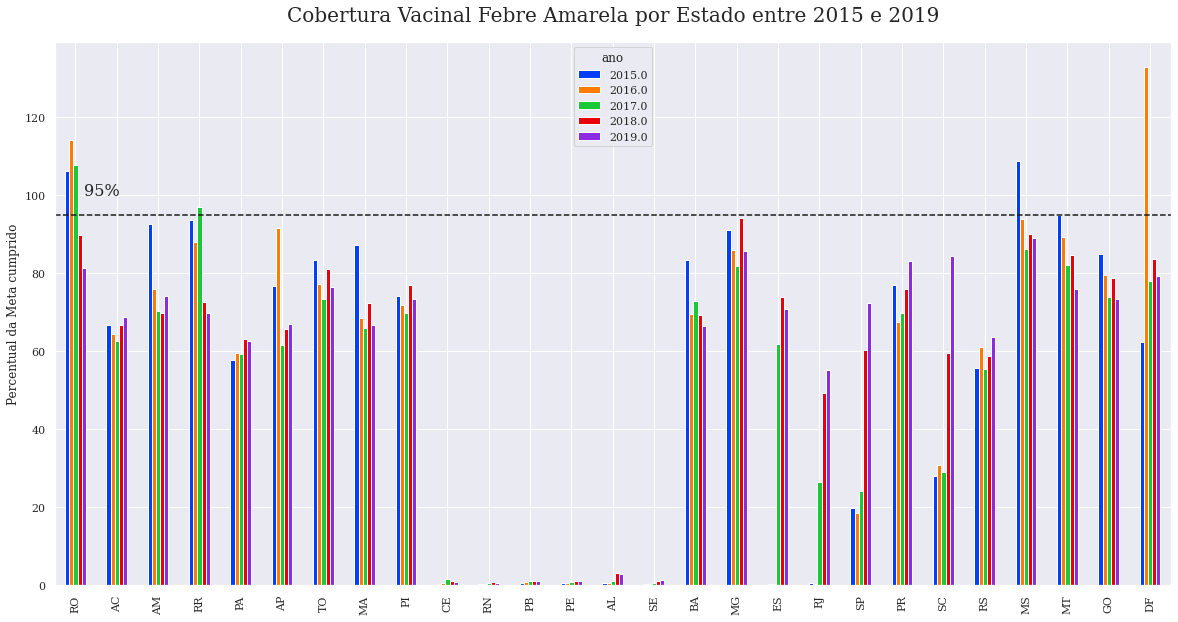

In [22]:
sns.set_theme(font='serif', palette='bright')
febre_amarela[:-1].plot(kind='bar', figsize=(20,10))
plt.axhline(95, color='k', ls='--')
plt.annotate('95%', xy=(0.2,100), fontsize=16)
plt.title('Cobertura Vacinal Febre Amarela por Estado entre 2015 e 2019', fontsize=20, pad= 20)
plt.ylabel('Percentual da Meta cumprido');

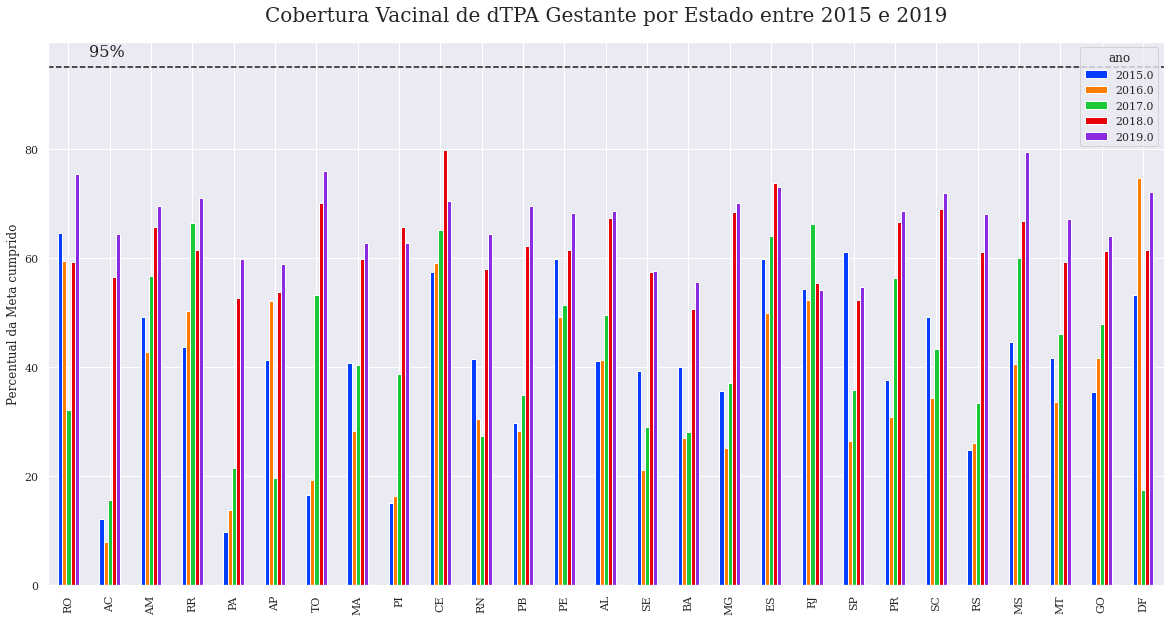

In [28]:
sns.set_theme(font='serif', palette='bright')
dtpa[:-1].plot(kind='bar', figsize=(20,10))
ax = plt.axhline(95, color='k', ls='--')
plt.annotate('95%', xy=(0.5,97), fontsize=16)
plt.title('Cobertura Vacinal de dTPA Gestante por Estado entre 2015 e 2019', fontsize=20, pad= 20)
plt.ylabel('Percentual da Meta cumprido');

In [56]:
#0,7,9,15,23 - selecionando a linha temporal das 4 vacinas escolhidas
serie_temporal_imunos = dados_ano_imuno.iloc[[0,7,9,15,23 ] , : ].set_index('Imuno').T
serie_temporal_imunos.head()

Imuno,BCG,Poliomielite,Febre Amarela,Tríplice Viral D2,dTpa gestante
1994,88.31,58.24,5.27,0.0,0.0
1995,103.63,77.83,4.81,0.0,0.0
1996,104.21,80.86,5.65,0.0,0.0
1997,117.12,89.27,7.84,0.0,0.0
1998,111.61,95.30,18.49,0.0,0.0


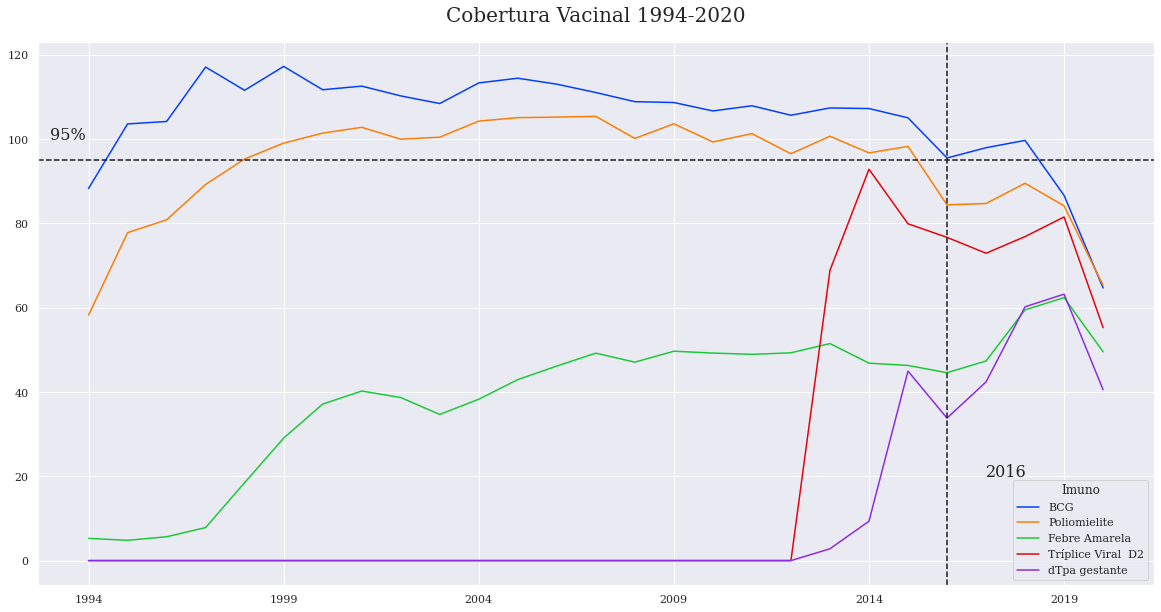

In [57]:
#criando uma visualização comparativa de série temporal
serie_temporal_imunos[:-1].plot(figsize=(20,10))
plt.axvline(22, color='k', ls='--')
plt.axhline(95, color='k', ls='--')
plt.annotate('95%', xy=(-1,100), fontsize=16);
plt.annotate('2016', xy=(23,20), fontsize=16);
plt.title('Cobertura Vacinal 1994-2020', fontsize=20, pad=20);

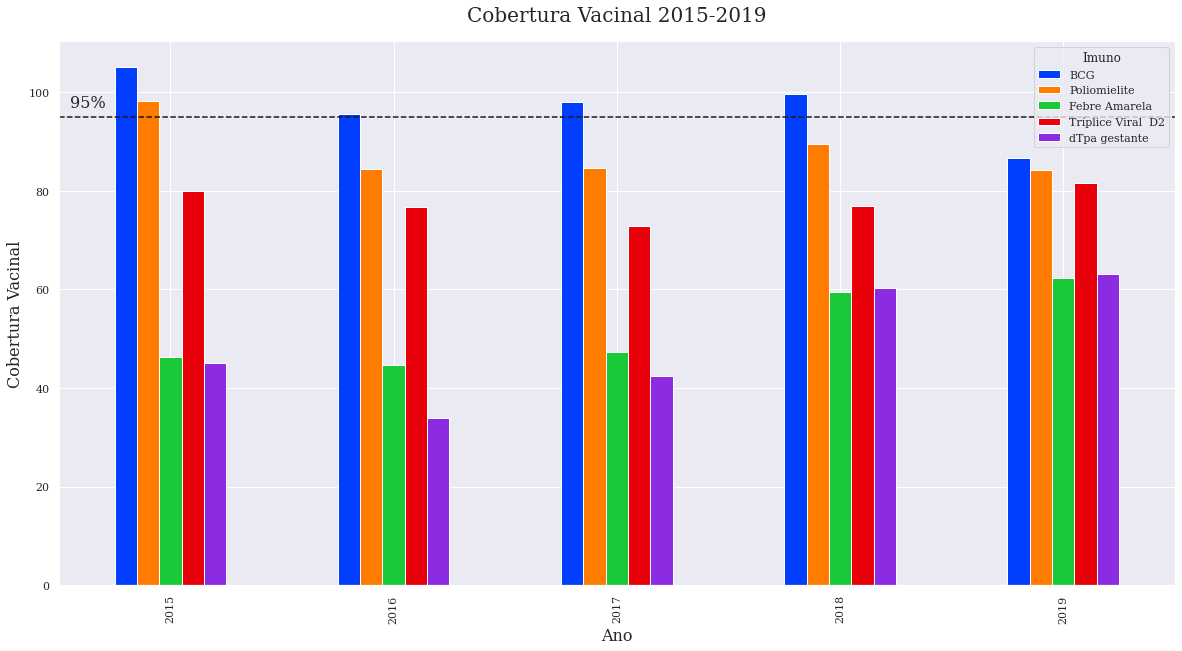

In [58]:
#Gráfico de barras por vacina e cobertura
serie_temporal_imunos[21:-2].plot(figsize=(20,10), kind='bar')
plt.axhline(95, color='k', ls='--')
plt.annotate('95%', xy=(-0.45,97), fontsize=16);
plt.title('Cobertura Vacinal 2015-2019', fontsize=20, pad=20);
plt.ylabel('Cobertura Vacinal', fontsize=16)
plt.xlabel('Ano', fontsize=16);

O aumento na cobertura das vacinas de Febre Amarela pode ter se dado pelo aumento da área de circulação do vírus: 

https://sbim.org.br/images/files/ms-sei-implantacao-da-vfa-dose-de-reforco.pdf

## **Caminhos descartados** *(por não localização de base de dados ou falta de tempo útil para uma análise mais aprofundada)*

### Caminhos possíveis: 

Replicar os resultados do [Relatório Fake News e Cobertura Vacinal](https://sbim.org.br/images/files/po-avaaz-relatorio-antivacina.pdf)

[Análise Exploratória sobre o movimento antivacina](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0102-311X2020001405001)

 [The Lancet - Vaccine Confidence](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)31558-0/fulltext)

 [BCG e casos de Tuberculose](http://portalsinan.saude.gov.br/tuberculose)

 [Doenças que voltaram a aparecer depois de serem consideradas erradicadas - Sarampo, pólio, difteria e rubéola:](https://www.bbc.com/portuguese/brasil-44706026)

## **ESCOPO DO ESTUDO - A IMUNIZAÇÃO DA GESTANTE COM A VACINA *dTPA* E O IMPACTO NOS CASOS DE COQUELUCHE EM CRIANÇAS DE ATÉ DOIS MESES**

#### **Inspiração:**  [Vacina dTPA e sua importância no combate à coqueluche](http://www.blog.saude.gov.br/index.php/promocao-da-saude/53804-a-importancia-da-vacina-dtpa-para-a-mae-e-o-bebe)

Após muita revisão de literatura e buscas infrutíferas por bases de dados completas e confiáveis, me chamou a atenção o fato de uma vacina que entrou recentemente no calendário de vacinação, a dTPA tem como principal objetivo reduzir os casos de coqueluche em recém nascidos. Vamos verificar se o aumento observado da cobertura vacinal entre 2013 (introdução do imuno) à 2019 representou alguma queda nos casos confirmados da doença. Para isso vamos usar a base do [TABNET](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/coquebr.def). Por se tratar de dados atualizados em janeiro de 2020, vamos nos ater aos dados até 2019. Este Dataset possui colunas com casos desde antes de 1975, no entanto só contam os casos notificados a partir de 2007.

Artigos e postagens de interesse:

https://www.saude.se.gov.br/obstetra-fala-sobre-a-importancia-da-vacina-dtpa-na-gestacao/

http://www.blog.saude.gov.br/index.php/promocao-da-saude/53804-a-importancia-da-vacina-dtpa-para-a-mae-e-o-bebe

Situação epidemiológica da coqueluche no Distrito Federal entre 2007 e 2016: https://www.scielo.br/scielo.php?pid=S1983-80422019000400764&script=sci_arttext

https://familia.sbim.org.br/vacinas/vacinas-disponiveis/vacina-triplice-bacteriana-acelular-do-tipo-adulto-dtpa


Implantação da vacina no estado de SC: https://www.saude.sc.gov.br/index.php/documentos/informacoes-gerais/redes-de-atencao-a-saude-2/rede-aten-a-saude-materna-e-infantil-rede-cegonha/acervo-e-e-books/10411-nota-tecnica-vacinacao-para-gestantes-dtpa-prevencao-de-coqueluche-em-menores-de-1-ano/file


Calendário Vacinal para gestantes: https://sbim.org.br/images/calendarios/calend-sbim-gestante.pdf

Informe Técnico MS: https://portalarquivos2.saude.gov.br/images/pdf/2015/junho/26/Informe-T--cnico-dTpa-2014.pdf

Caderneta da Gestante: https://portalarquivos2.saude.gov.br/images/pdf/2018/agosto/31/Caderneta-da-Gestante-2018.pdf

Linha do Tempo: Vacinação no Brasil: https://radis.ensp.fiocruz.br/index.php/home/reportagem/linha-do-tempo-vacinacao-no-brasil

Panfleto educativo sobre a vacina: https://meucalendariodevacinas.com.br/educacao/dtp-dtpa/

Evolução das vacinas: https://www.correiobraziliense.com.br/app/noticia/revista/2010/07/02/interna_revista_correio,200615/evolucao-da-vacina-no-brasil.shtml#:~:text=1904%3A%20Obrigatoriedade%20da%20vacina%C3%A7%C3%A3o%20contra,Nacional%20de%20Controle%20da%20Poliomielite.


Portaria que incluiu a dTPA no calendário de vacinação: http://conitec.gov.br/images/Incorporados/VacinadTPa-Gestantes-final.pdf


Informações sobre dtPA: http://www.cortesvillela.com.br/noticias/importancia-vacina-dtpa.html


In [32]:
coqueluche_recem_nascidos_base = 'https://raw.githubusercontent.com/ClarisseAlvarenga/bootcamp_alura/master/modulo2/dados_atualizados/casos_coqueluche_bebes_ate_2_meses.csv'

In [36]:
dados_coqueluche = pd.read_csv(coqueluche_recem_nascidos_base, sep=';', skiprows=4, skipfooter=17, encoding='ISO-8859-1', engine='python', na_values='-')
dados_coqueluche.head()

,Região/UF de notificação,<1975,1988,1991,1999,2003,2004,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Região Norte,NaN,NaN,NaN,1.0,NaN,NaN,NaN,23.0,49.0,30.0,15.0,37.0,79,97,150,54.0,21.0,23.0,16.0,12.0,607
1,.. Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,13.0,3,19,24,9.0,4.0,NaN,NaN,1.0,85
2,.. Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,7.0,4,2,13,2.0,NaN,1.0,NaN,1.0,37
3,.. Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,19.0,6.0,1.0,8.0,48,37,18,20.0,6.0,7.0,2.0,2.0,184
4,.. Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,2,11,3,NaN,2.0,5.0,NaN,1.0,27


In [37]:
dados_coqueluche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Região/UF de notificação  33 non-null     object 
 1   <1975                     3 non-null      float64
 2   1988                      3 non-null      float64
 3   1991                      3 non-null      float64
 4   1999                      3 non-null      float64
 5   2003                      3 non-null      float64
 6   2004                      3 non-null      float64
 7   2006                      14 non-null     float64
 8   2007                      29 non-null     float64
 9   2008                      29 non-null     float64
 10  2009                      30 non-null     float64
 11  2010                      26 non-null     float64
 12  2011                      31 non-null     float64
 13  2012                      33 non-null     int64  
 14  2013        

In [54]:
#visualizando todos os dados do dataset
dados_coqueluche

,Região/UF de notificação,<1975,1988,1991,1999,2003,2004,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Região Norte,NaN,NaN,NaN,1.0,NaN,NaN,NaN,23.0,49.0,30.0,15.0,37.0,79,97,150,54.0,21.0,23.0,16.0,12.0,607
1,.. Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,13.0,3,19,24,9.0,4.0,NaN,NaN,1.0,85
2,.. Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,7.0,4,2,13,2.0,NaN,1.0,NaN,1.0,37
3,.. Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,19.0,6.0,1.0,8.0,48,37,18,20.0,6.0,7.0,2.0,2.0,184
4,.. Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,2,11,3,NaN,2.0,5.0,NaN,1.0,27
5,.. Pará,NaN,NaN,NaN,1.0,NaN,NaN,NaN,6.0,17.0,12.0,6.0,4.0,14,15,34,8.0,1.0,1.0,6.0,2.0,127
6,.. Amapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,3.0,NaN,2.0,3,5,17,2.0,3.0,2.0,NaN,NaN,51
7,.. Tocantins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,1.0,5,8,41,13.0,5.0,7.0,8.0,5.0,96
8,Região Nordeste,NaN,NaN,1.0,NaN,NaN,NaN,4.0,59.0,88.0,72.0,44.0,156.0,277,339,868,334.0,132.0,134.0,161.0,190.0,2859
9,.. Maranhão,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,6.0,3.0,1.0,13.0,8,18,60,36.0,6.0,6.0,5.0,10.0,178


In [42]:
#separando apenas os dados por região
dados_coqueluche_por_regiao = dados_coqueluche[dados_coqueluche['Região/UF de notificação'].str.startswith('Região')]

In [41]:
dados_coqueluche_por_regiao

,Região/UF de notificação,<1975,1988,1991,1999,2003,2004,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Região Norte,NaN,NaN,NaN,1.0,NaN,NaN,NaN,23.0,49.0,30.0,15.0,37.0,79,97,150,54.0,21.0,23.0,16.0,12.0,607
8,Região Nordeste,NaN,NaN,1.0,NaN,NaN,NaN,4.0,59.0,88.0,72.0,44.0,156.0,277,339,868,334.0,132.0,134.0,161.0,190.0,2859
18,Região Sudeste,1.0,1.0,NaN,NaN,1.0,1.0,4.0,146.0,222.0,120.0,133.0,582.0,867,1022,1085,327.0,146.0,164.0,180.0,86.0,5088
23,Região Sul,NaN,NaN,NaN,NaN,NaN,NaN,6.0,107.0,144.0,87.0,57.0,158.0,496,392,465,158.0,86.0,111.0,70.0,39.0,2376
27,Região Centro-Oeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,51.0,49.0,19.0,33.0,106,194,277,103.0,23.0,26.0,38.0,20.0,963


In [52]:
#separando os dados por UF, excluindo os indexes referentes às regiões
dados_coqueluche_por_UF = dados_coqueluche.drop(index=[0,8,18,23,27]).set_index('Região/UF de notificação').reset_index()

In [53]:
dados_coqueluche_por_UF

,Região/UF de notificação,<1975,1988,1991,1999,2003,2004,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,.. Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,13.0,3,19,24,9.0,4.0,NaN,NaN,1.0,85
1,.. Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,7.0,4,2,13,2.0,NaN,1.0,NaN,1.0,37
2,.. Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,19.0,6.0,1.0,8.0,48,37,18,20.0,6.0,7.0,2.0,2.0,184
3,.. Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,2,11,3,NaN,2.0,5.0,NaN,1.0,27
4,.. Pará,NaN,NaN,NaN,1.0,NaN,NaN,NaN,6.0,17.0,12.0,6.0,4.0,14,15,34,8.0,1.0,1.0,6.0,2.0,127
5,.. Amapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,3.0,NaN,2.0,3,5,17,2.0,3.0,2.0,NaN,NaN,51
6,.. Tocantins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,1.0,5,8,41,13.0,5.0,7.0,8.0,5.0,96
7,.. Maranhão,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,6.0,3.0,1.0,13.0,8,18,60,36.0,6.0,6.0,5.0,10.0,178
8,.. Piauí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,4,39,85,55.0,13.0,11.0,5.0,12.0,227
9,.. Ceará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,7.0,4.0,11.0,19,17,73,31.0,12.0,6.0,4.0,17.0,204
